# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

### Answer Q1:

In the original file the Smartcab does not move. according method returns None.

So the rewards given depend mainly on the traffic light:

As the car is not moving, there are no accidents (which lead to high negative rewards). Idling at the traffic light gives a postive reward, if it fits to the rules (i.e. red light, or green light, but traffic does not allow to move), and a negative reward, if it does not, i.e. if the cab idles at a green trafic light.





### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

### Answer Q2:
#### agent.py: flags
there are 3 classes to be initialized and customized by flags: env(Environment), sim(simulator), agent. Each of them has a set of flags. 

Generally we can classify the flags into 3 groups:<br>
Defining the parameters of environment (size of town, number of other cabs), the parameters of learning/use of learning as parameters of the agent, and the whole rest definie handling options for the simulation. So the most interesting parameters are: 
* **environment:** <br>
flags define the model: size of town, and number of other cabs<br>
-- num_dummies: discrete number of dummy agents in the environment, default is 100<br>
-- grid_size:discrete number of intersections (columns, rows), default is (8, 6)<br>

* **agent**:<br>
-- learning: if false: no learning at all <br>
-- epsilon: continuous value for the exploration factor, default is 1<br>
-- alpha: continuous value for the learning rate, default is 0.5<br>
** set primary agent** flag to influence metric:
-- enforce_deadline - set to True to enforce a deadline metric

#### environment.py:  which class function triggers the agent' actions?
the next step is triggered by simulator.run(), line 182: there is called :
<pre><code>self.env.step()</code></pre>
(self (=simulator) has a class variable env of class environment, implemented by environment.py. There we find the method enviroment.step()

There the environment updates the primary_agent (=learning agent) and dummy_agents (random cabs creating the traffic) by <pre><code>agent.update()</code></pre>. For the learning agent it is implemented in agent.py, for the dummies in environment.py.

#### simulator.py: difference between render() and render_text():
render_text displays the results of one step in the command line window, render does the same in the pygame window:
<pre><code>
def render_text(self, trial, testing=False):
        """ This is the non-GUI render display of the simulation. 
            Simulated trial data will be rendered in the terminal/command prompt. """</code></pre>
<pre><code>
def render(self, trial, testing=False):
        """ This is the GUI render display of the simulation. 
            Supplementary trial data can be found from render_text. """</code></pre>

#### planner.py: 
it considers first the East-West-Direction.




-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


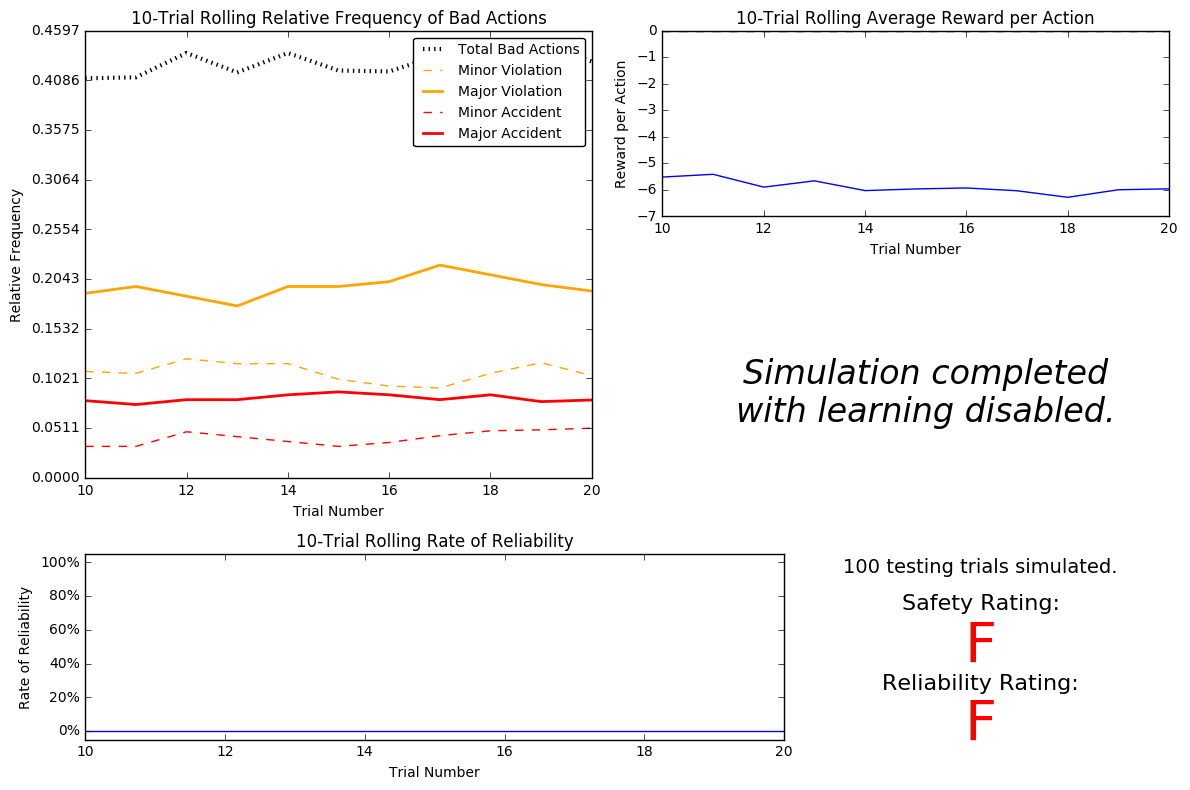

In [186]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

### Answer Q3:

##### safety/reliablilty:
To answer the simplest question first: choosing a random action is not a good strategy to set up a safe or reliable smartcab!
As the number of trials increases, there is no improvement of the behavior. Our car has nothing learned.

#### 10-Trial rolling relative frequency of bad decisions:
We have a high probalitiy of bad decisions:
* 0.4 - any bad decision
* 0.2 - major violation
* 0.05 - major accidents
honestly: this is better then expected... because up to now we ignore the traffic lights completly:
Assuming that we have a probalitiy of 0.5 that a traffic light is red, and a probality of 0.75 that we drive forward in any direction, we get a probability of 0.375 that we pass a red traffic light. So major violations are "so seldom" because in some case we are allowed to turn right, even if traffic light is red.
major accidents: this is a major violation, and there is a second cab which is concerned... so more or less in every 4th critical situation (-major violation) an accident occurs.

#### 10-trial rolling average reward:
the average reward is constantly very low (between -5 and -6), and it mirrors more or less the figure of major accidents. <br>
according to the log the reward strategy is about:<br>
-- ignoring a red light: -10<br>
-- following the waypoint: +2 <br>
-- taking into account the green light, but ignoring the waypoint: +1<br>
-- idling at red light: +1<br>
-- causing a major accident: -40 <br>
-- causing a minor accident: -20 <br>
-- idling at green light without reason: -5<br>

#### 10-Trial Rolling Rate of Reliablilty:
I understand the figure in this trial: cab is never reliable...- what is reasonable as the next step is determined by random. So why should the cab ever arrive? The probality to arrive must be something like<br>
<pre><code>numberOfPossibleToArriveAtDestination * 0.25 exp (lengthOfTheWay)</code></pre><br>
=> so more or less never.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

#### Answer Q4:
* efficiency:<br>
-- prio1: way point<br>to avoid detours<br>
-- prio2: (light, waypoint, other cabs)<br> certain combinations allow passing a red light 

* safety<br>
-- prio1: light: <br>in most cases light== red domiates the strategy: cab has to stop<br>
-- prio2: (light, waypoints, other cabs)<br> certain combinations forbid going on even if traffic light is green.

* features ignored:<br>
-- deadline: <br>
I do not see any reason to change the behavior because deadline is reached. If there is a strategy to arrive faster without breaking rules then it should be used from the beginning. It is one large benefit of automous driving that a machine drives emotionless, so no breaking rules because of hurry or anger. Why should we give it up?<br>
-- cars coming from the right side:<br> assuming that they stop if the traffic light is red, there are no critical situations<br>


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

### Answer Q5:

feature to be taken into account: <br>

* way points:<br>
right, forward, left: 3

* inputs from environment: <br>
-- TrafficLight: red, green: 2<br>
other cabs:<br>
-- 'oncoming': valid_actions: [None, 'right', 'forward', 'left']: 4 <br>
-- 'left': relevant actions: [None, 'right', 'forward', 'left']: 4 <br>
-- 'right':  ignored: 0 <br>

featurespace: 96

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

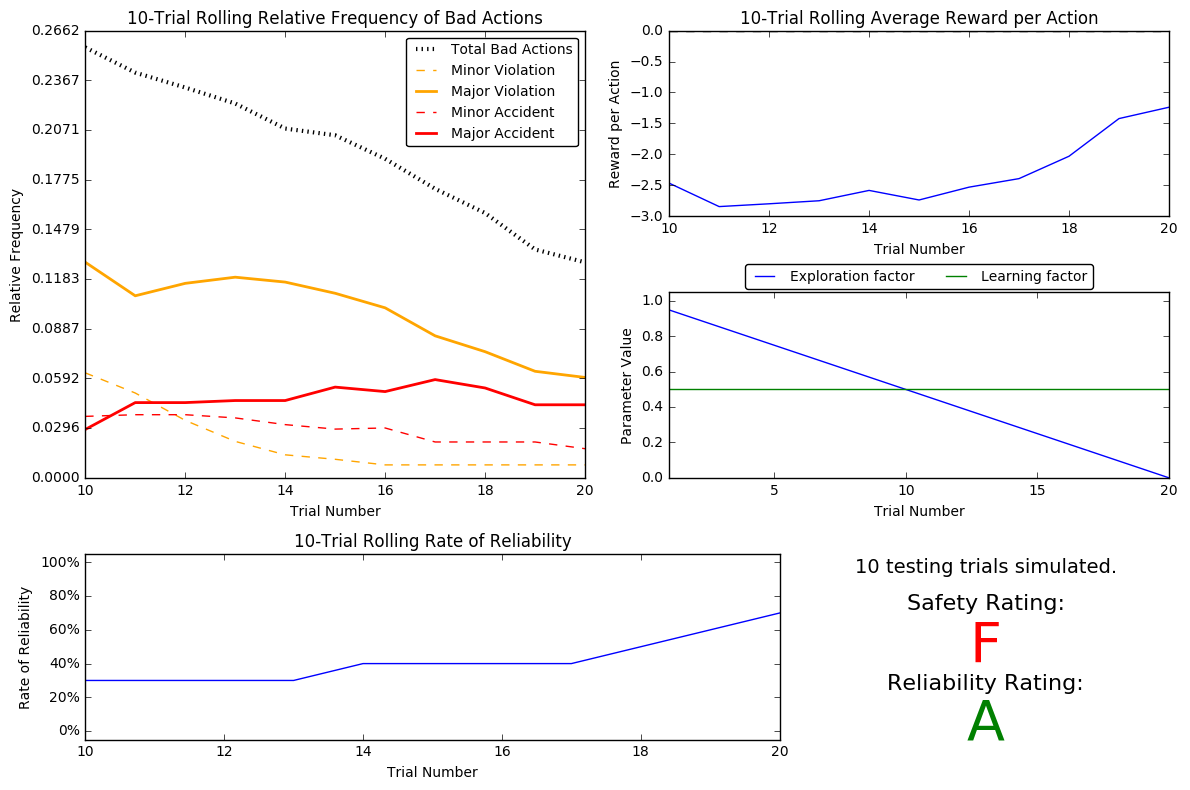

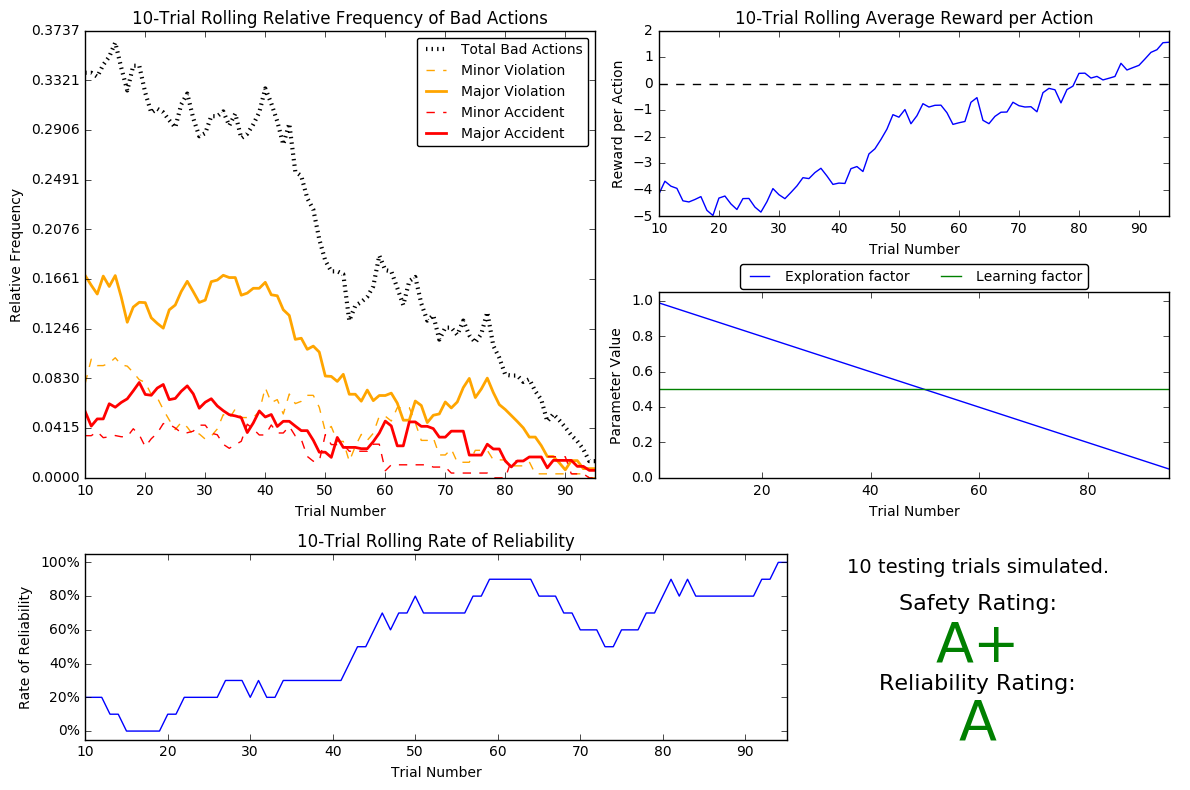

In [40]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_20.csv')
vs.plot_trials('sim_default-learning.csv')



### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

### Answer Q6:

#### original default learning is the upper figure, with 20 steps:
10 testing trials did not give any stable result - see how much it differs: 
5 runs with testing trials=10: (F,A),(F,D),(F,B),(D,D),(D,A)   (Safety, Reliabilty)
5 runs testing trials=50: (F,C), (F,D), (F,C), (F,F), (F,F)

Other then the basic driving agent we see that the accident figures decrease. So the agent is learning, but not very fast. 20 training trials is not enough. It seems as the number of major accidents decreases linearly, but slowly - I would assume we need around 100 training trials. 

Parameter panel is as expected.

Together with the training trails the relative freqency of accidents decrease, and the average reward increases - but not yet enough to be significantly better rated then the basic agent.

### 2nd figure is default learning, linear decaying, but 100 steps
discussed further down

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

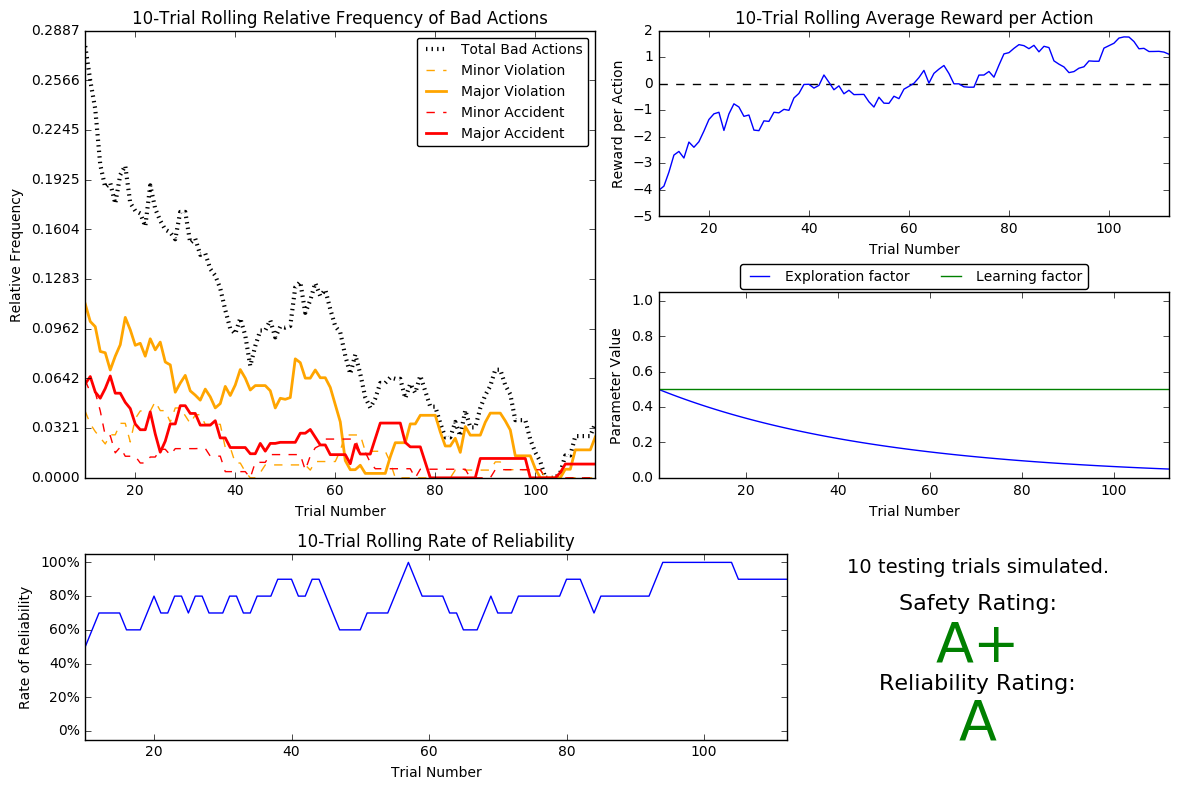

In [39]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')



### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

### Answer Q7:

decaying function: **1/(t exp 2)**<br>
Results:<br>
5 runs: 10 testing trials: (F,B),(A+,A),(A,B), (F,A),(A+,A)<br>
3 runs: 50 testing trials: (F,A), (F,A), (F,B)<br>

decaying function: **epsilon=alpha**t, alpha=0,5
Results:<br>
5 runs: 10 testing trials: (A+,A), (A+,B), (A+,A+), (A+,A+), (A+,A+)<br>
5 runs: 50 testing trials: (F,B), (A+,A), (F,B), (F,B), (F,A) <br>

The most annoying detection is that testing is not stable, if you see my test runs above. I have no explication why runs with 10 testing trials are pretty good, and with 50 testing trials are not very promissing.
For sure I'm satisfied with the runs of with 10 testing trials, but does this help?


Anyhow:
epsilon=1/(t exp 2) is better then linear, and epsilon=alpha exp(t) is even an improvement, at leat is we use ca. 120 trainig steps.

Alternating alpha had not have a big effect, and I haven't tried to alternate the epsilon-tolerance.

For the overall result:
Without question: <br>
most effect had:
- **increasing the number of training trials numbers**<br>
See at the default learner, I increased the number of steps to 100 and ended up at a quite good rating. As I run only one time with 10 testing trials, the reliabilty of the result is questionable.
- **changing the decaying function for Epsilon**<br>
at least for the short testing trials there is a clear improvement between 1/(t exp 2) and alpa exp t.


*How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*<br>
As we see: most important is the number of steps: we have now about the same number of steps as we have in the status space, and this makes a remarkable difference.

I have difficulties to define a metric about the improvement: best metric seems to me the average reward figure, and here we see, that - with a comparable number of training trials - apha exp t arrives at a positive reward much earlier (around training trial 40) then the linear function (around training trial 80)

*Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*<br>
Hmm, it is like children education: the figures shows that there is improvement... no question, but we can detect some kinds of drawbacks where accidents increase again. For more exploration I would compare the alternatives after 200 training trials.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

### Answer Q8:

*You need to explain what constitutes an optimal policy for the agent. This can be done by giving some general examples.*
This is for me the same behavior as I would do as human, i.e.<br>
- to optimze safety:<br>
never pass a red light in forward or in left direction
- to optimize reliability:<br>
follow the way points if traffic light and traffic allows,i.e.<br>
traffic light is green, waypoint is forward - there is no reason to do anything else then drive forward. 

*You need to give an example from the generated Q-table for an optimal policy and explain why this policy is optimal. You need to give an example from the generated Q-table for a sub-optimal policy and explain why this policy is not optimal*
Example: traffic light green, waypoint forward - we find in the table:<br>
only 15 stati,<br>
7: forward => optimal
1: left => Nonsense, as none oncoming, and left is blocked by traffic light <br>
6: right => most of them nonsens, just a dertour <br> 
1: None => acceptable because ongoing turns left (you might argue that this is for safety)


    .
find in github an xls, derived out of sim_improved-learning.txt.
For the red traffic light I checked against optimal policies:

- red light, WP != right: best policy == None
- red light, WP == right: best policy:<br>
right unless there is a oncoming cab, turning left (what should not happen, because they have red light as well) going forward. 

I was astonished to find 7 suboptimal policies of 47 states

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

### Answer Q9:


*What kind of information does the smartcab receive from the environment? Does it receive "global" information, such as its position relative to the destination? Or merely "local" information such as the status of the intersection it's in?*
It gets only local information... infos about other cars and about the waypoint. So it has "only" to understand some local rules, like "follow the waypoint"<br>

*Do the agent and the destination begin each trial in the same place, or do they move around? Can the agent learn the best route by rote?*
It is part of the game that the environment pass the waypoint to the cab. So it need not learn the route to destination, it has only to learn to do what it was told.<br>

*Is there an "extra reward" for reaching the destination? In other words, is there anything to propagate back, other than the reward for obeying traffic rules and following the planner?*
I do not see anything like this.

<br>
So overall: No future rewards for the cab, so no gamma....

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.